# Chapter 6: Clustering
## K-Means Clustering

In [3]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 5,5

In [5]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

## Building and Runnning model

In [6]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [7]:
## PLotting your model outputs

In [8]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns = ['Target']

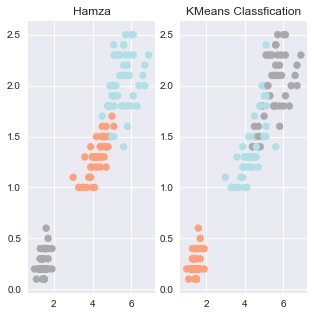

In [9]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width,
            c= color_theme[iris.target], s=50           
           )
plt.title('Hamza')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width,
            c= color_theme[clustering.labels_], s=50           
           )
plt.title('KMeans Classfication')




In [11]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

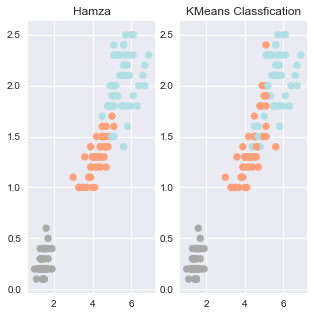

In [12]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width,
            c= color_theme[iris.target], s=50           
           )
plt.title('Hamza')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width,
            c= color_theme[relabel], s=50           
           )
plt.title('KMeans Classfication')




In [13]:
print(classification_report(y, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



# Chapter 8) Basic Algorithm Learning
## Linear Regression

In [65]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from scipy.stats import spearmanr

from collections import Counter

In [10]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [14]:
address = '../Datasets/enrollment_forecast.csv'
enroll = pd.read_csv(address)
enroll.columns = ['year','roll','unem','hgrad','inc']
enroll.head()


,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


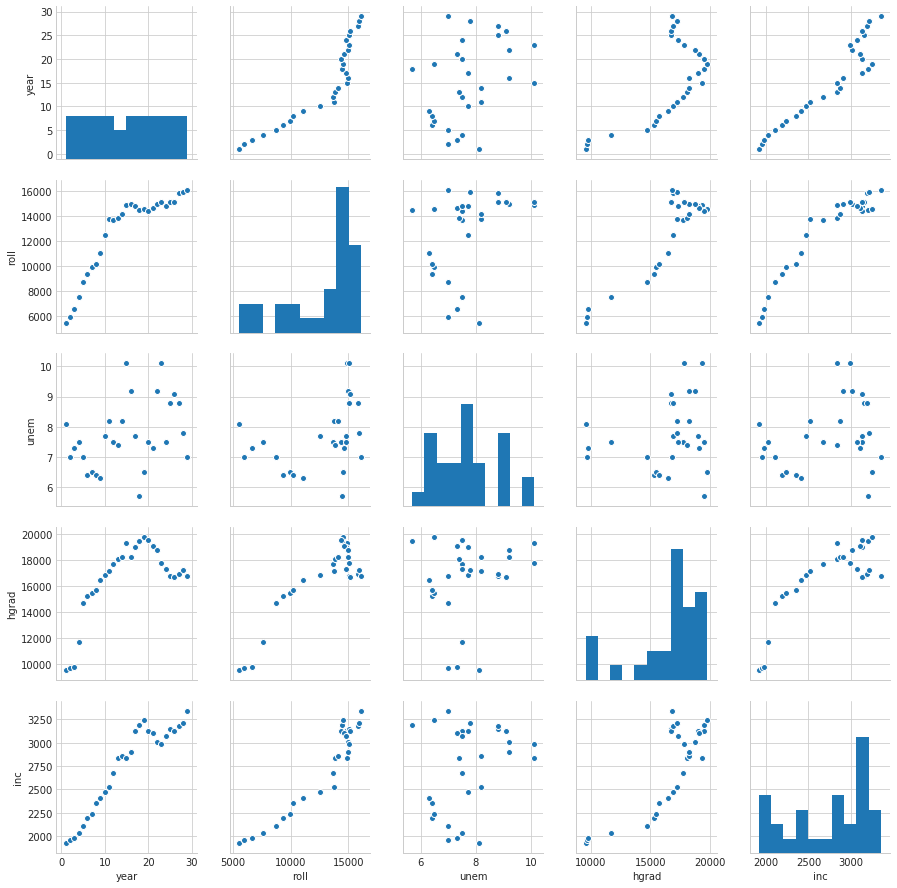

In [15]:
sb.pairplot(enroll)

In [18]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [39]:
enroll_data = enroll.iloc[:,2:4]
enroll_target = enroll.iloc[:,1]
enroll_data_names = ['unem', 'hgrad']
X, y = scale(enroll_data), enroll_target

In [40]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [41]:
LinReg = LinearRegression(normalize=True)
LinReg.fit(X, y)
LinReg.score(X,y)

0.8488812666133723

# Logistic Regression

In [53]:
address = '../Datasets/mtcars.csv'
cars = pd.read_csv(address)
cars_data = cars.iloc[:, [5,11]].values
cars_data_names = ['drat', 'carb']
y = cars.iloc[:,9]
cars.head()



,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


** Checking for independence between features **

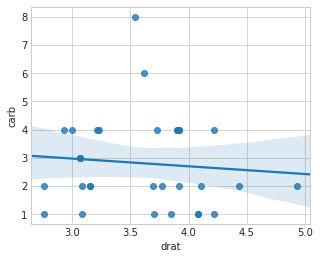

In [55]:
sb.regplot(x='drat', y='carb', data= cars, scatter=True)

In [58]:
drat = cars['drat']
carb = cars['carb']

spearmanr_coefficient, p_value = spearmanr(drat, carb)
spearmanr_coefficient,p_value

(-0.1252229399201802, 0.49468240297065824)

In [59]:
cars.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

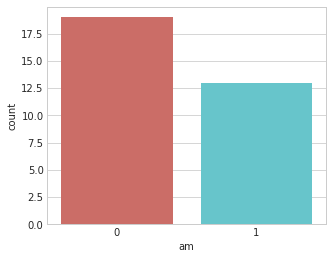

In [61]:
sb.countplot(x='am', data=cars, palette='hls')

In [63]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [71]:
X = scale(cars_data)
LogReg = LogisticRegression()
LogReg.fit(X,y)


print(LogReg.score(X,y))

0.8125


In [73]:
y_pred = LogReg.predict(X)

from sklearn.metrics import classification_report
print(classification_report(y, y_pred))


             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32



# Naive Bayes Classifiers

In [78]:
import urllib
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score


In [81]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=',')
dataset[0]

array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
         0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
       278.   ,   1.   ])

In [83]:
X = dataset[:,0:42]
y = dataset[:,-1]

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=17)

In [103]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(x_train,y_train)

y_expect = y_test
y_pred = BernNB.predict(x_test)
accuracy_score(y_expect, y_pred)


0.8834759710335747

In [97]:
MultiNB = MultinomialNB()
MultiNB.fit(x_train,y_train)

y_pred = MultiNB.predict(x_test)
accuracy_score(y_expect, y_pred)


0.8393680052666228

In [98]:
GausNB = GaussianNB()
GausNB.fit(x_train,y_train)

y_expect = y_test
y_pred = GausNB.predict(x_test)
accuracy_score(y_expect, y_pred)


0.7676102699144174

In [104]:
BernNB = BernoulliNB(binarize=0.15)
BernNB.fit(x_train,y_train)

y_expect = y_test
y_pred = BernNB.predict(x_test)
accuracy_score(y_expect, y_pred)


0.8834759710335747